In [1]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

torch.random.manual_seed(0)

model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3.5-mini-instruct", 
    device_map="cuda", 
    torch_dtype="auto", 
    trust_remote_code=True, 
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3.5-mini-instruct")

messages = [
    {"role": "system", "content": "You are a helpful AI assistant."},
    {"role": "user", "content": "Can you provide ways to eat combinations of bananas and dragonfruits?"},
    {"role": "assistant", "content": "Sure! Here are some ways to eat bananas and dragonfruits together: 1. Banana and dragonfruit smoothie: Blend bananas and dragonfruits together with some milk and honey. 2. Banana and dragonfruit salad: Mix sliced bananas and dragonfruits together with some lemon juice and honey."},
    {"role": "user", "content": "What about solving an 2x + 3 = 7 equation?"},
]

pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)

generation_args = {
    "max_new_tokens": 500,
    "return_full_text": False,
    "temperature": 0.0,
    "do_sample": False,
}

output = pipe(messages, **generation_args)
print(output[0]['generated_text'])


config.json:   0%|          | 0.00/3.45k [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3.5-mini-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3.5-mini-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
`flash-attention` package not found, consider installing for better performance: No module named 'flash_attn'.
Current `flash-attention` does not support `window_size`. Either upgrade or use `attn_implementation='eager'`.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/195 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.98k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/data/shared/.anaconda/anaconda3/envs/venv311/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
You are not running the flash-attention implementation, expect numerical differences.


 To solve the equation 2x + 3 = 7, follow these steps:

Step 1: Isolate the term with the variable (2x) by subtracting 3 from both sides of the equation.

2x + 3 - 3 = 7 - 3
2x = 4

Step 2: Solve for x by dividing both sides of the equation by the coefficient of x, which is 2.

2x / 2 = 4 / 2
x = 2

So, the solution to the equation 2x + 3 = 7 is x = 2.


In [4]:
# ! pip install flash-attn --no-build-isolation

In [1]:
from PIL import Image 
import requests 
from transformers import AutoModelForCausalLM 
from transformers import AutoProcessor 

model_id = "microsoft/Phi-3.5-vision-instruct" 

# Note: set _attn_implementation='eager' if you don't have flash_attn installed
model = AutoModelForCausalLM.from_pretrained(
  model_id, 
  device_map="cuda", 
  trust_remote_code=True, 
  torch_dtype="auto", 
  _attn_implementation='eager'    
)

# for best performance, use num_crops=4 for multi-frame, num_crops=16 for single-frame.
processor = AutoProcessor.from_pretrained(model_id, 
  trust_remote_code=True, 
  num_crops=4
) 

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/data/shared/.anaconda/anaconda3/envs/venv311/lib/python3.11/site-packages/transformers/models/auto/image_processing_auto.py:513: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


In [5]:
images = []
placeholder = ""

# Note: if OOM, you might consider reduce number of frames in this example.
for i in range(1,2):
    url = f"https://i.sstatic.net/eAKQu.png" 
    images.append(Image.open(requests.get(url, stream=True).raw))
    placeholder += f"<|image_{i}|>\n"

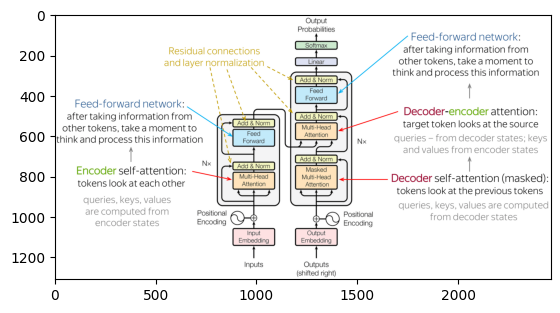

In [6]:
import matplotlib.pyplot as plt
import numpy as np
url = f"https://i.sstatic.net/eAKQu.png"
plt.imshow(Image.open(requests.get(url, stream=True).raw))

In [7]:
messages = [
    {"role": "user", "content": placeholder+"Summarize the image."},
]

prompt = processor.tokenizer.apply_chat_template(
  messages, 
  tokenize=False, 
  add_generation_prompt=True
)

inputs = processor(prompt, images, return_tensors="pt").to("cuda:0") 

generation_args = { 
    "max_new_tokens": 1000, 
    "temperature": 0.0, 
    "do_sample": False, 
} 

generate_ids = model.generate(**inputs, 
  eos_token_id=processor.tokenizer.eos_token_id, 
  **generation_args
)

# remove input tokens 
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids, 
  skip_special_tokens=True, 
  clean_up_tokenization_spaces=False)[0] 

print(response)

/data/shared/.anaconda/anaconda3/envs/venv311/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
You are not running the flash-attention implementation, expect numerical differences.


The image is a diagram that explains the architecture of a transformer model, which is a type of neural network used in machine learning. It shows the flow of information through various components such as the encoder and decoder, with attention mechanisms that allow the model to focus on different parts of the input data. The diagram also includes the concept of residual connections and layer normalization, which are techniques used to improve the training and performance of the model.
